# HOUSE

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.housing.csv')
pd.options.display.max_columns=None
pd.options.display.max_rows=None
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df.shape

(1168, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,df[i].isnull().sum())

LotFrontage 214
Alley 1091
MasVnrType 7
MasVnrArea 7
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinType2 31
FireplaceQu 551
GarageType 64
GarageYrBlt 64
GarageFinish 64
GarageQual 64
GarageCond 64
PoolQC 1161
Fence 931
MiscFeature 1124


In [6]:
df.drop(['Id','PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


### Analyzing the Data

In [8]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

###### We dropped the BsmtFinSF1,BsmtFinSF2,BsmtUnSF columns because total of these threee columns is TotalBsmtSF column.

In [9]:
df['BsmtHalfBath'] = 0.5 * df['BsmtHalfBath']
df['HalfBath'] = 0.5 * df['HalfBath']

In [10]:
df['BsmtBath'] = df['BsmtHalfBath'] + df['BsmtFullBath']
df['Bath'] = df['HalfBath'] + df['FullBath']

In [11]:
df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

###### We multiply the BsmtHalfBath and HalfBath column with 0.5 and then concate the FullBath with HalfBath and BsmtHalfBath with BsmtFullBath. After concatenating the columns we dropped  BsmtFullBath,BsmtHalfBath,FullBath,HalfBath columns.

In [12]:
df['Total_porch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [13]:
df.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

###### After concatenating the four columns,OpenPorchSF,EnclosedPorch,3SsnPorch,	ScreenPorch we dropped these columns and added a new column to a dataset.

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtBath,Bath,Total_porch
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,1078,GasA,TA,Y,SBrkr,958,0,0,958,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,0,0,2,2007,WD,Normal,128000,0.0,2.0,205
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,0,0,10,2007,WD,Normal,268000,1.0,2.0,431
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,0,0,6,2007,WD,Normal,269790,1.0,2.5,130
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,0,0,1,2010,COD,Normal,190000,0.0,2.0,122
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,6,2009,WD,Normal,215000,0.5,2.0,0


In [15]:
df.shape

(1168, 68)

###### Now we have 1168 rows and 68 columns.

### Handling Missing Values

In [16]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [17]:
df['MasVnrType'] = df['MasVnrType'].fillna('NA')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [18]:
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

In [19]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')

In [20]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [21]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtBath,Bath,Total_porch
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,1078,GasA,TA,Y,SBrkr,958,0,0,958,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,0,0,2,2007,WD,Normal,128000,0.0,2.0,205
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,0,0,10,2007,WD,Normal,268000,1.0,2.0,431
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,0,0,6,2007,WD,Normal,269790,1.0,2.5,130
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,0,0,1,2010,COD,Normal,190000,0.0,2.0,122
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,6,2009,WD,Normal,215000,0.5,2.0,0


###### We fill all the NaN values

### Data  Visualization

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

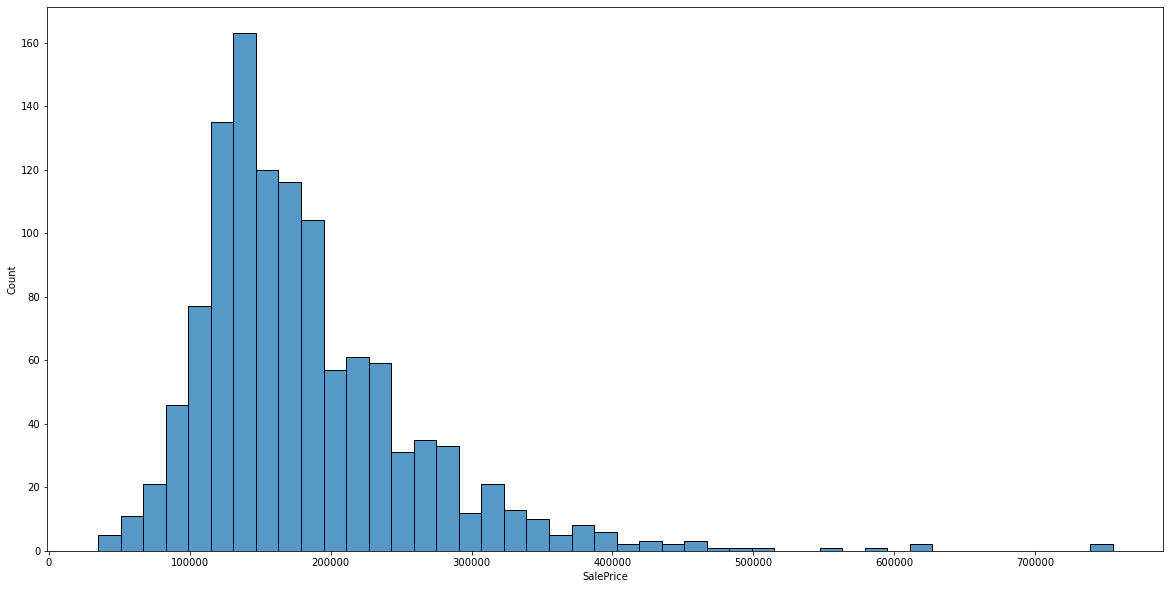

In [22]:
plt.figure(figsize=(20,10))
sns.histplot(x = 'SalePrice',data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

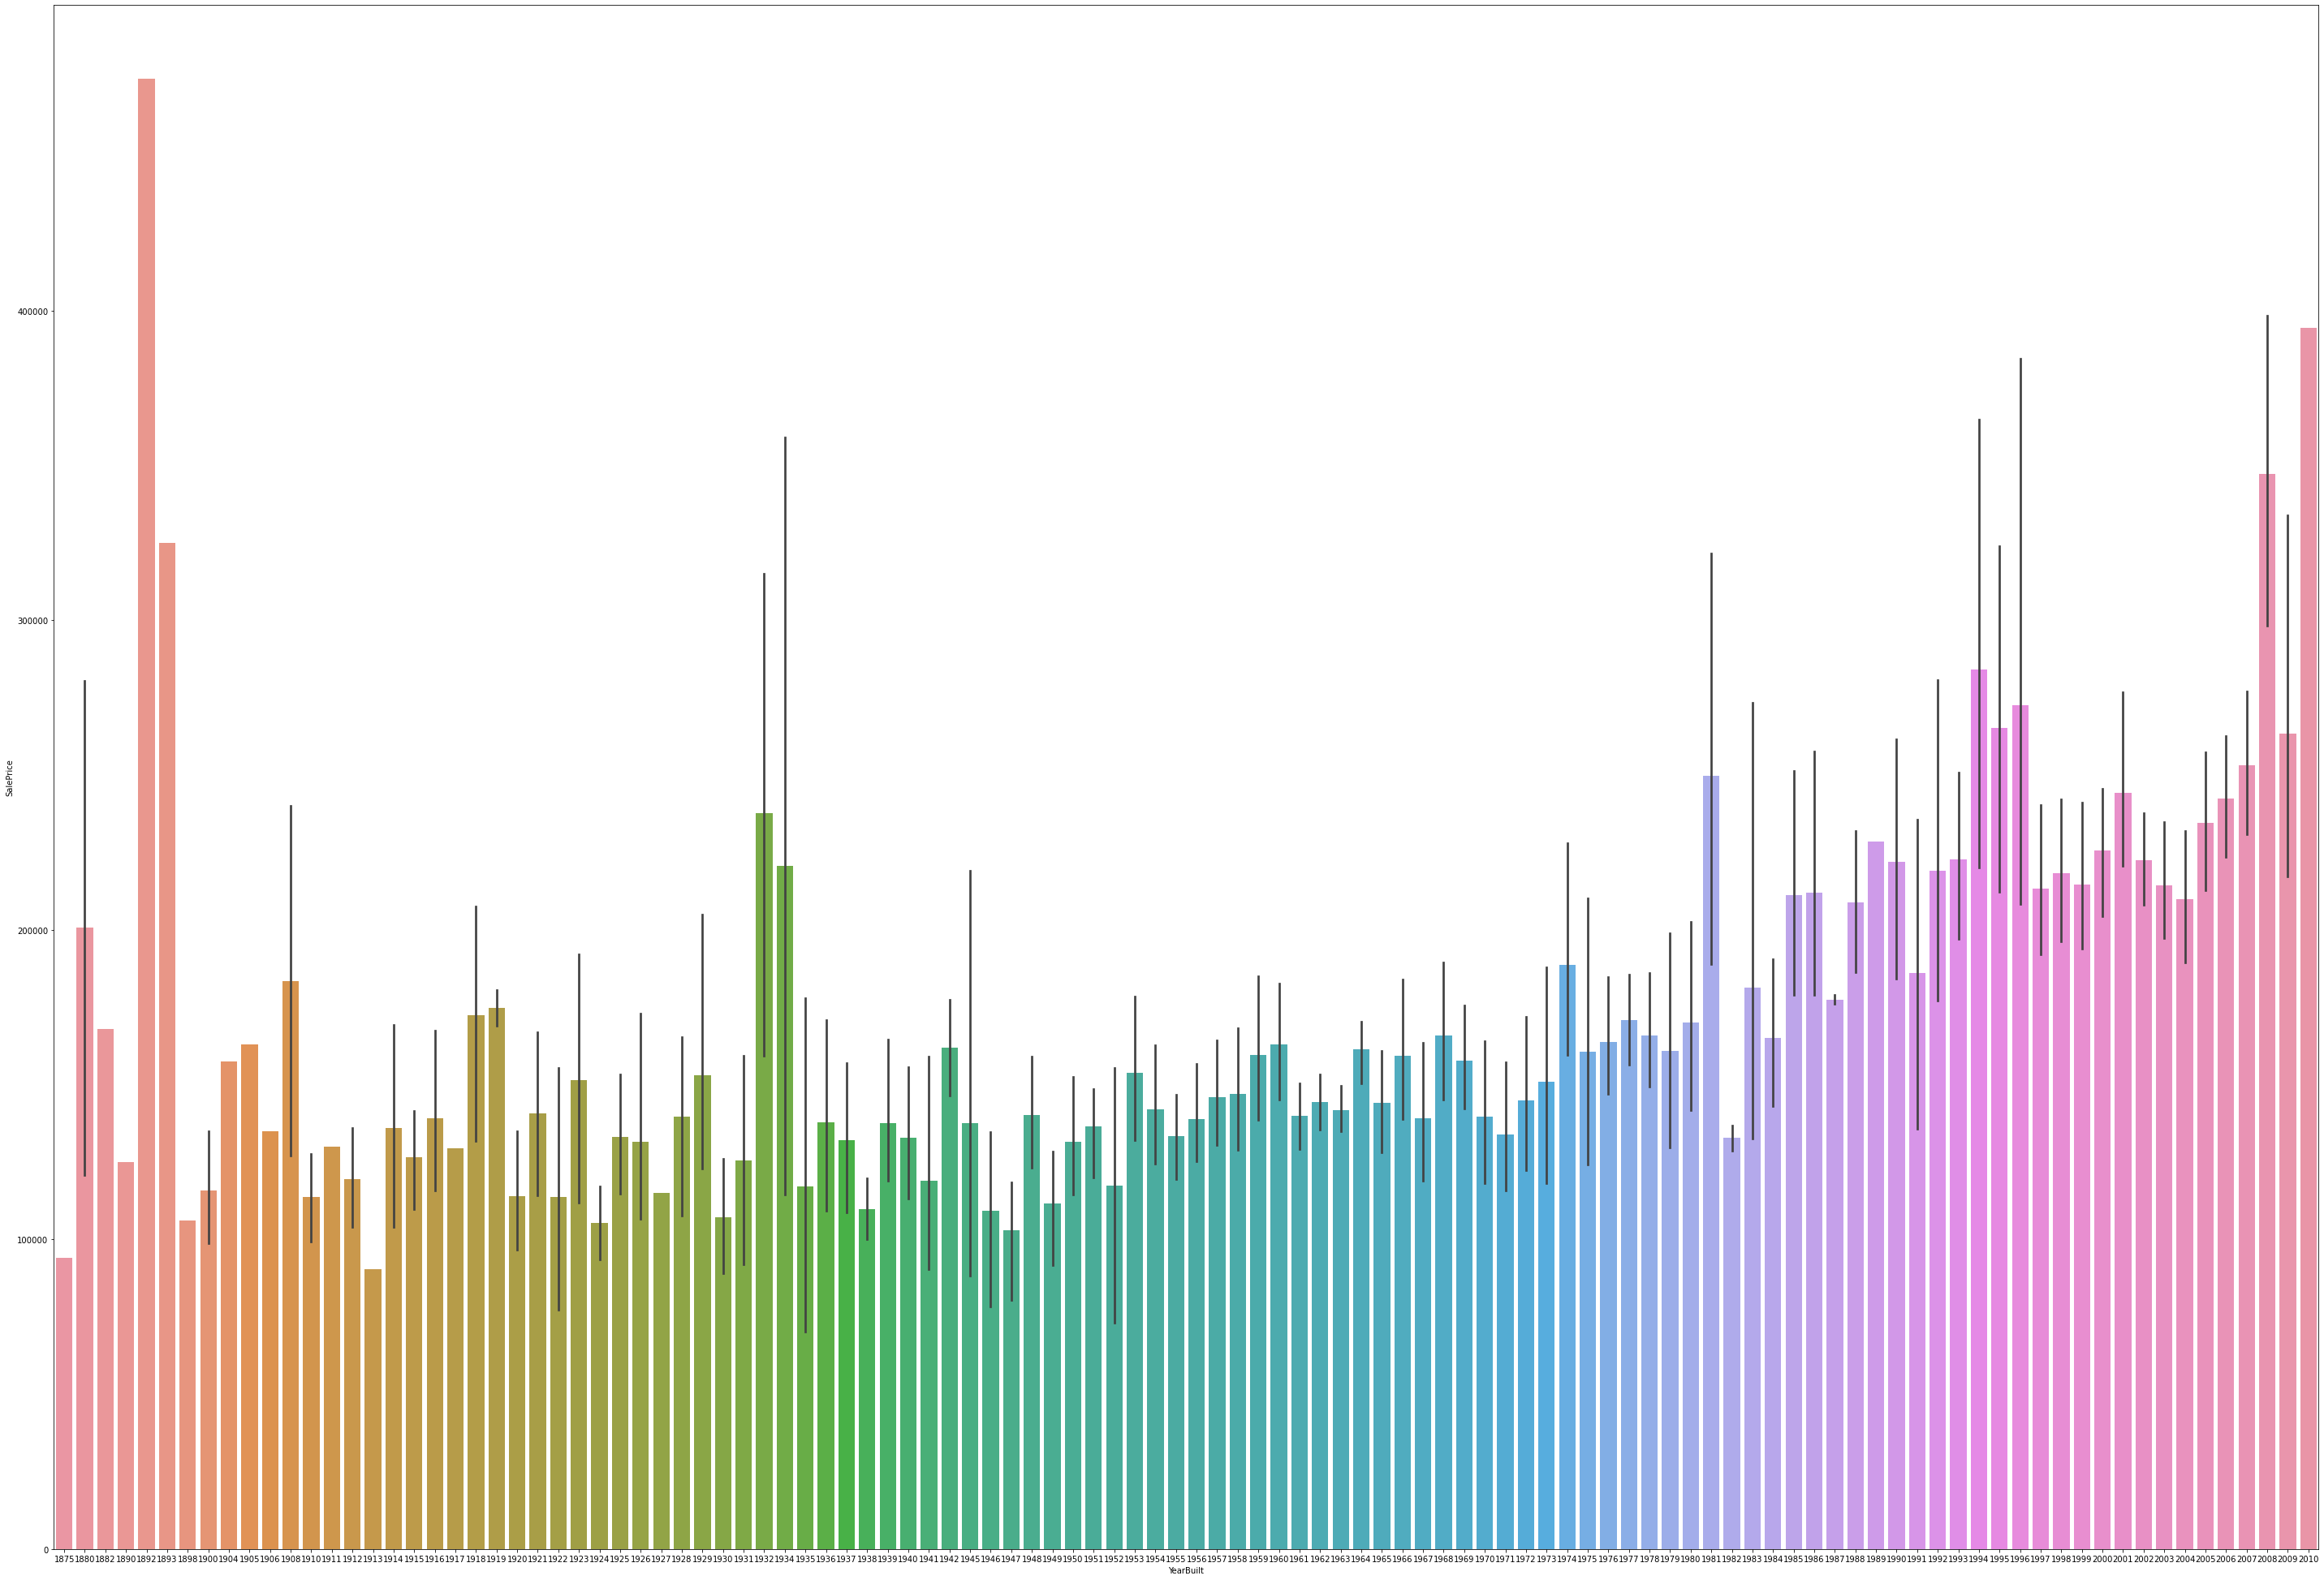

In [23]:
plt.figure(figsize=(50,35))
sns.barplot(x = 'YearBuilt',y = 'SalePrice',data=df)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

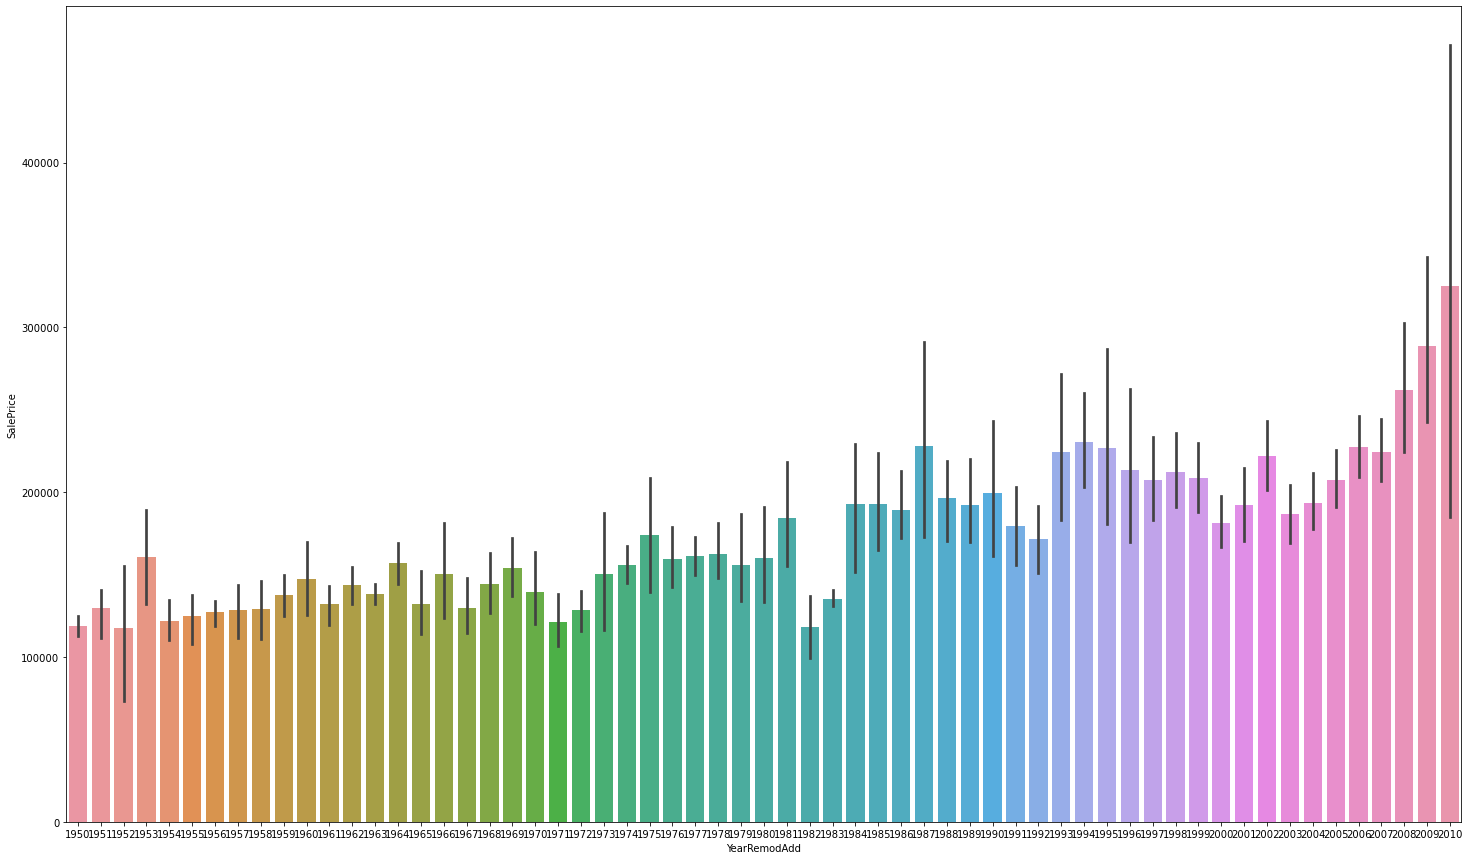

In [24]:
plt.figure(figsize=(25,15))
sns.barplot(x = 'YearRemodAdd',y = 'SalePrice',data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

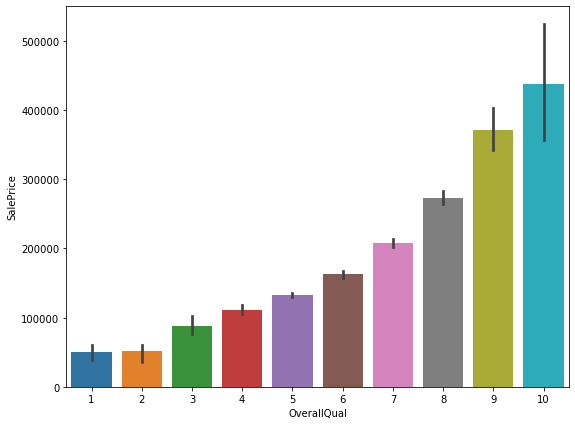

In [25]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'OverallQual',y = 'SalePrice',data=df)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

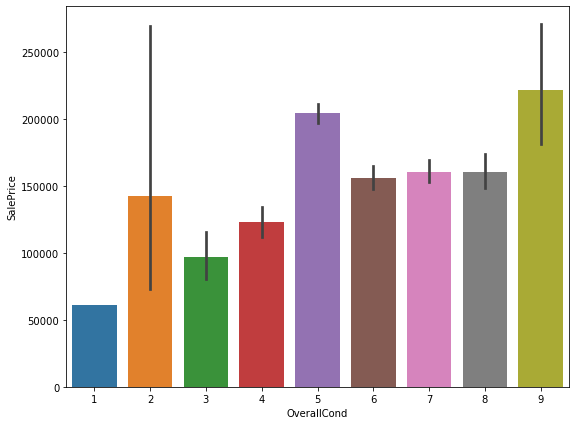

In [26]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'OverallCond',y = 'SalePrice',data=df)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

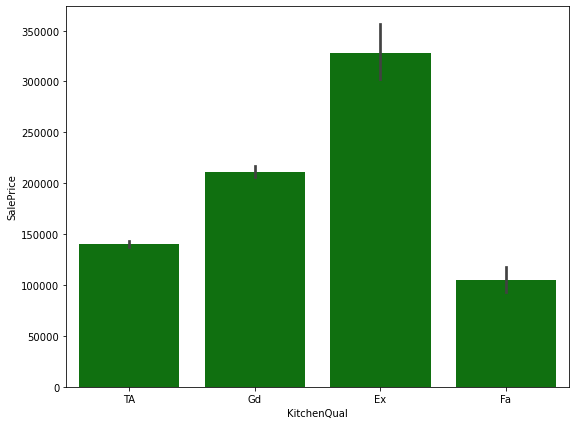

In [27]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'KitchenQual',y = 'SalePrice',data=df,color='g')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

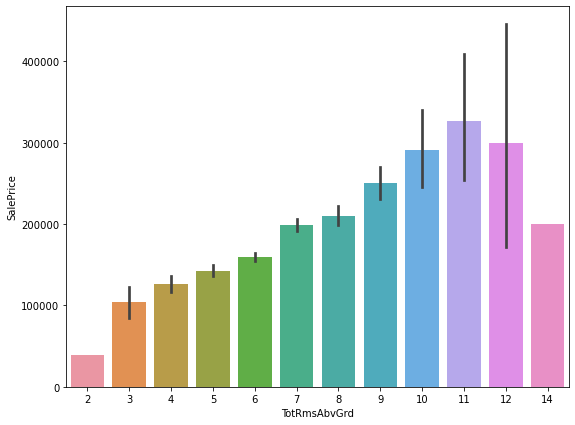

In [28]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'TotRmsAbvGrd', y = 'SalePrice',data=df)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

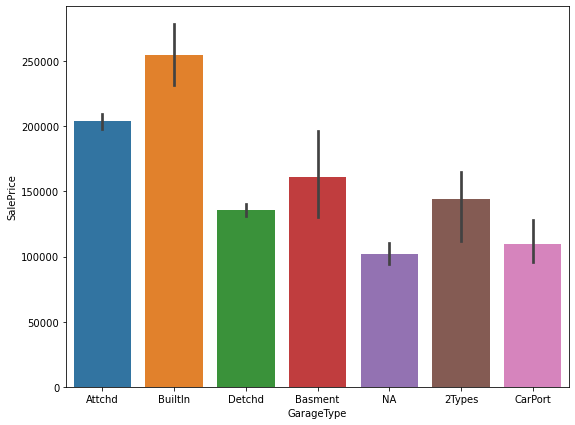

In [29]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'GarageType',y = 'SalePrice',data=df)

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

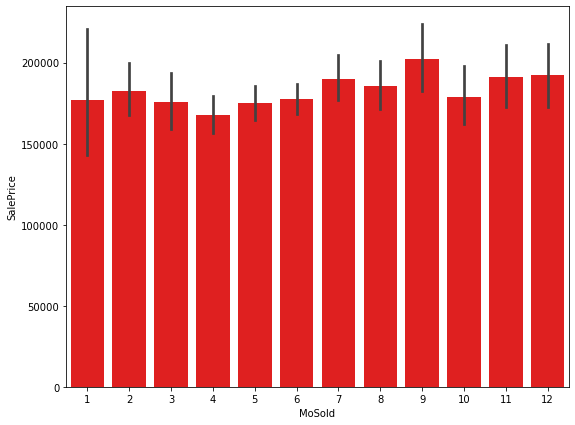

In [30]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'MoSold',y = 'SalePrice',data=df,color='r')

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

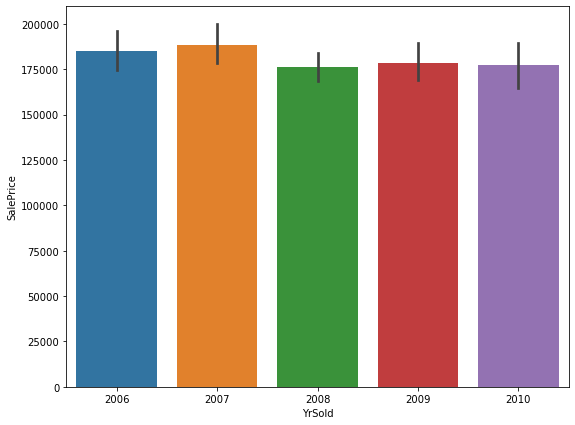

In [31]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'YrSold',y = 'SalePrice',data=df)

### Description

In [32]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtBath,Bath,Total_porch
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,1061.095034,1169.860445,348.826199,6.380137,1525.066781,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,3.448630,47.315068,6.344178,2007.804795,181477.005993,0.453339,1.756849,88.266267
std,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,442.272249,391.161983,439.696370,50.892844,528.042957,0.817229,0.216292,1.598484,0.650575,24.198559,0.745554,214.466769,126.158988,44.896939,543.264432,2.686352,1.329738,79105.586863,0.517233,0.632892,105.912958
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000,0.000000,1.000000,0.000000
50%,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,3.000000,1.000000,6.000000,1.000000,1978.193841,2.000000,480.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000,0.000000,2.000000,50.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000,1.000000,2.500000,140.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,3.000000,3.500000,1027.000000


### Correlation

In [33]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtBath,Bath,Total_porch
MSSubClass,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.214042,-0.227927,0.300366,0.053737,0.086448,-0.013283,0.283506,0.051179,-0.035792,0.073130,-0.027639,-0.092408,-0.022609,0.009583,-0.023503,-0.016015,-0.038595,-0.060775,0.006472,0.189968,-0.010369
LotFrontage,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.356107,0.403436,0.089675,0.007506,0.374251,0.237199,-0.002729,0.318771,0.230610,0.055992,0.260252,0.322644,0.088334,0.196001,-0.001329,0.022517,-0.003885,0.323779,0.095161,0.168860,0.137158
LotArea,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.259733,0.312843,0.059803,-0.001915,0.281360,0.117351,-0.013075,0.184546,0.285983,-0.034765,0.158313,0.195162,0.216720,0.097107,0.051679,0.015141,-0.035399,0.249499,0.157158,0.110328,0.074114
OverallQual,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.528285,0.458758,0.316624,-0.039295,0.599700,0.099639,-0.178220,0.432579,0.390067,0.511482,0.596322,0.566782,0.227137,0.072247,-0.025786,0.090638,-0.048759,0.789185,0.095569,0.596704,0.198544
OverallCond,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.162481,-0.134420,0.036668,0.041877,-0.065006,0.028393,-0.076047,-0.039952,-0.013632,-0.301881,-0.161996,-0.126021,0.012290,-0.003603,0.075178,0.005519,0.055517,-0.065642,-0.019191,-0.170717,0.065091
YearBuilt,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.386265,0.279450,0.011834,-0.189044,0.198644,-0.080639,-0.167869,0.095476,0.134313,0.783710,0.525346,0.473216,0.204830,0.006408,-0.030008,0.031754,-0.013976,0.514408,0.159937,0.507967,-0.123491
YearRemodAdd,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.280720,0.233384,0.155102,-0.072526,0.295048,-0.035847,-0.139943,0.206923,0.118378,0.615011,0.428325,0.387744,0.197410,0.006874,-0.001199,0.024663,0.033265,0.507831,0.102927,0.465321,0.027897
MasVnrArea,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.365016,0.337143,0.172741,-0.070515,0.386791,0.091312,-0.037956,0.278661,0.242510,0.251293,0.342077,0.365280,0.151579,0.013590,-0.027582,0.013363,-0.013462,0.463626,0.090425,0.312923,0.050534
TotalBsmtSF,-0.214042,0.356107,0.259733,0.528285,-0.162481,0.386265,0.280720,0.365016,1.000000,0.813357,-0.164795,-0.043845,0.461067,0.036237,-0.065410,0.273895,0.328241,0.303038,0.423592,0.492980,0.234848,0.139252,-0.005920,0.032920,-0.030448,0.595042,0.301377,0.256531,0.148735
1stFlrSF,-0.227927,0.403436,0.312843,0.458758,-0.134420,0.279450,0.233384,0.337143,0.813357,1.000000,-0.205683,-0.035870,0.566049,0.106293,0.084392,0.399177,0.406537,0.213990,0.414905,0.475958,0.235467,0.144006,-0.010792,0.045991,-0.028604,0.587642,0.242569,0.277762,0.159069


<AxesSubplot:>

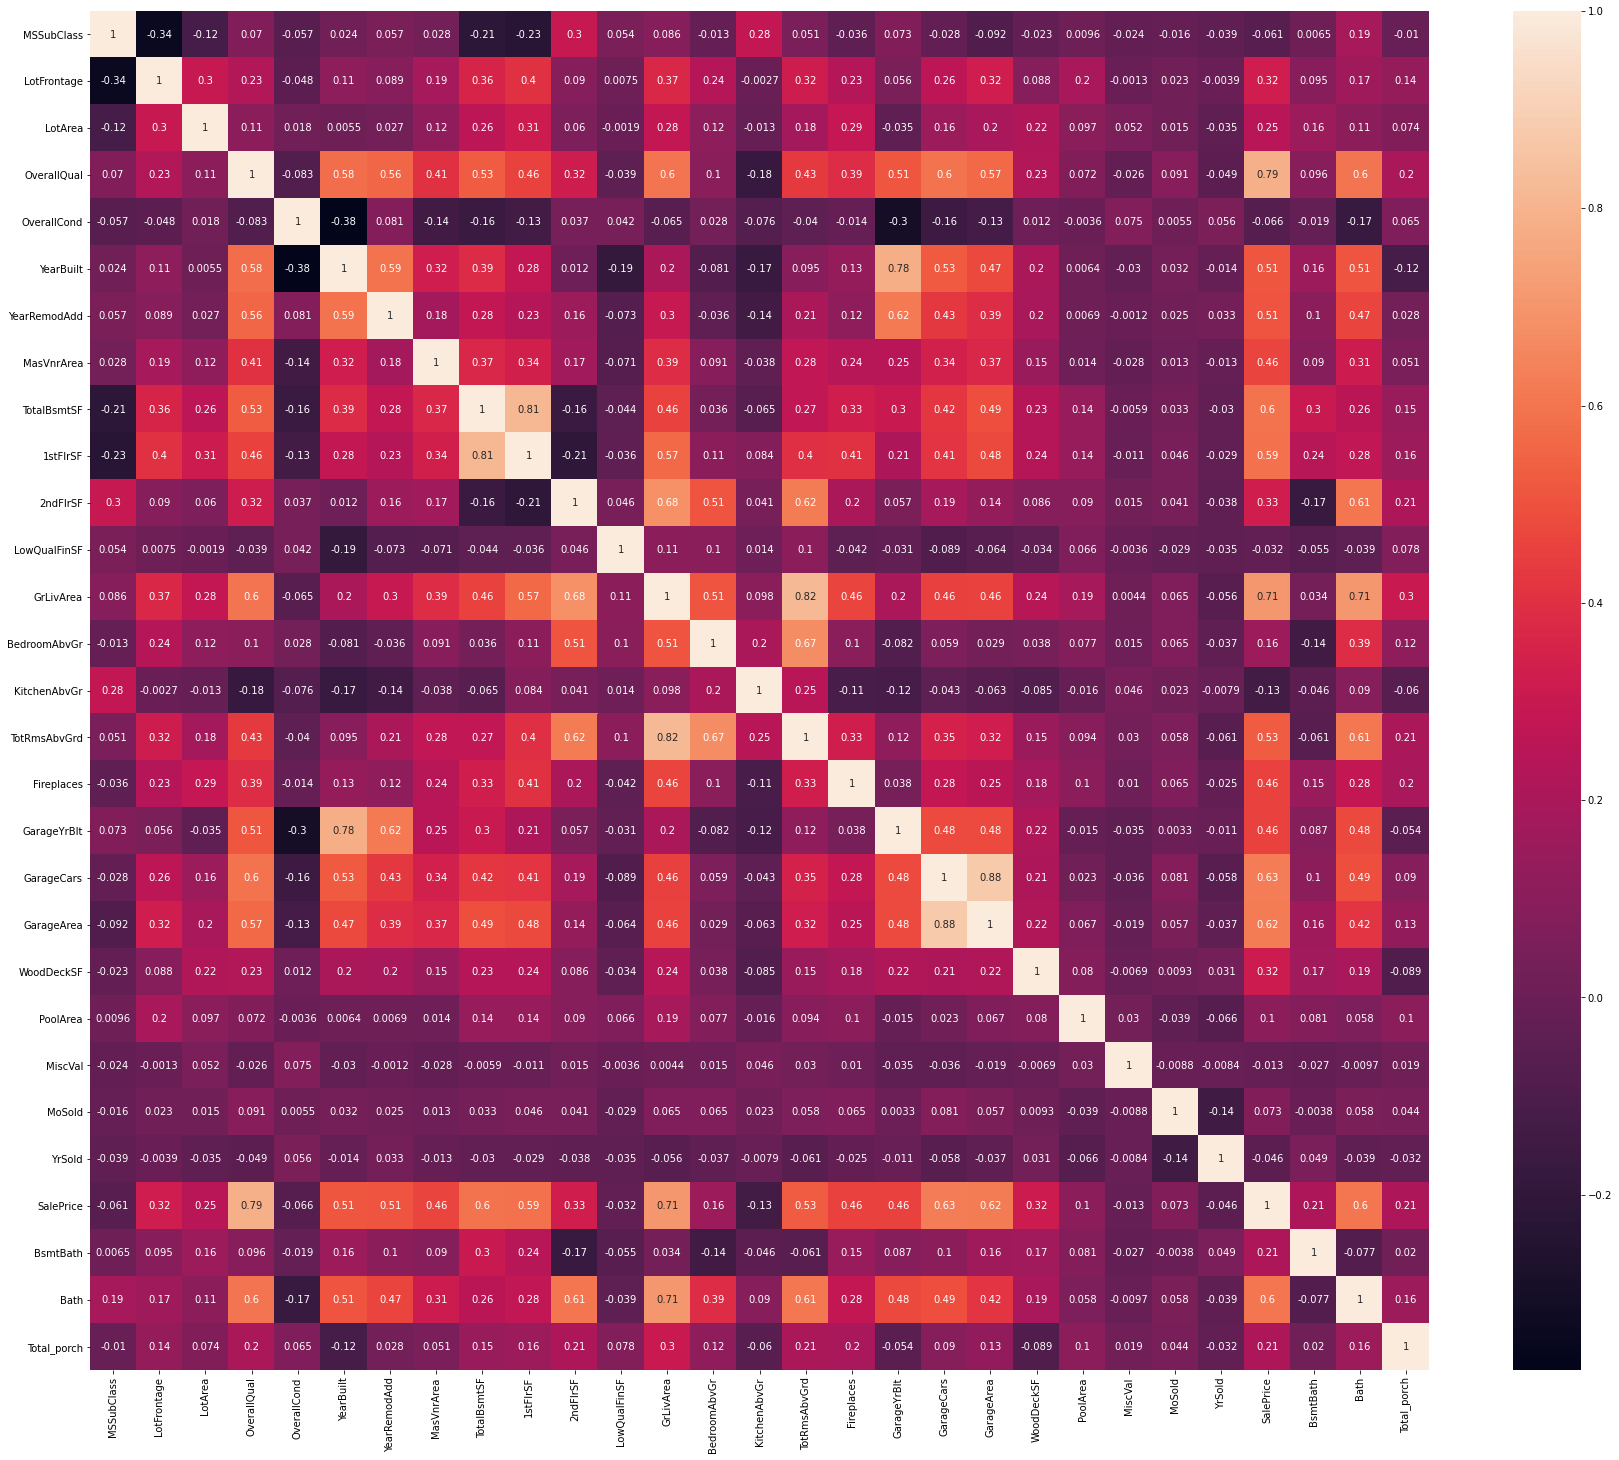

In [34]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)

In [35]:
non_cat_columns = ['LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
                  'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                  'GarageYrBlt','PoolArea','MoSold','YrSold','MiscVal',
                  'SalePrice']

### Data Cleaning

#### Skewness

In [36]:
for i in non_cat_columns:
    s = df[i].skew()
    print(i,s)

LotArea 10.659284548299626
YearBuilt -0.5792035025736898
YearRemodAdd -0.49586353822203716
MasVnrArea 2.8346577812934406
TotalBsmtSF 1.7445908855423957
1stFlrSF 1.5137072331415693
2ndFlrSF 0.8234785103609108
LowQualFinSF 8.666142302049042
GarageYrBlt -0.6629343832202744
PoolArea 13.243710763499866
MoSold 0.22097863147453375
YrSold 0.1157647118679818
MiscVal 23.065942802581013
SalePrice 1.953877705368286


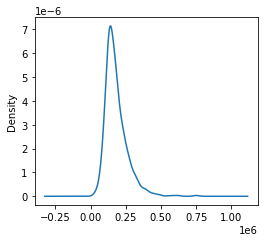

In [37]:
df[i].plot(kind ='density',subplots = True ,layout = (5,6),figsize=(28,20),sharex=False)
plt.show()

### Data Conversion

In [38]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [39]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = lec.fit_transform(df[i])

In [40]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtBath,Bath,Total_porch
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,3,0.0,3,4,1,2,4,4,0,6,1078,1,4,1,4,958,0,0,958,2,1,3,5,6,1,5,1,1977.0,2,2,440,5,5,2,0,0,0,2,2007,8,4,128000,0.0,2.0,205
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,3,0.0,2,2,2,4,1,1,0,5,2217,1,0,1,4,2217,0,0,2217,4,1,2,8,6,1,5,1,1970.0,3,2,621,5,5,2,81,0,0,10,2007,8,4,268000,1.0,2.0,431
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,3,0.0,2,4,2,2,4,0,2,6,1117,1,0,1,4,1127,886,0,2013,3,1,3,8,6,1,5,1,1997.0,3,2,455,5,5,2,180,0,0,6,2007,8,4,269790,1.0,2.5,130
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,4,4,1,6,1844,1,0,1,4,1844,0,0,1844,3,1,3,7,6,1,5,1,1977.0,2,2,546,5,5,2,0,0,0,1,2010,0,4,190000,0.0,2.0,122
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,4,126.0,2,4,1,2,4,4,0,6,1602,1,2,1,4,1602,0,0,1602,3,1,2,8,6,1,5,1,1977.0,0,2,529,5,5,2,240,0,0,6,2009,8,4,215000,0.5,2.0,0


### Checking Outliers

In [41]:
df_non_cat_columns = df[non_cat_columns]
df_non_cat_columns.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageYrBlt,PoolArea,MoSold,YrSold,MiscVal,SalePrice
0,4928,1976,1976,0.0,1078,958,0,0,1977.0,0,2,2007,0,128000
1,15865,1970,1970,0.0,2217,2217,0,0,1970.0,0,10,2007,0,268000
2,9920,1996,1997,0.0,1117,1127,886,0,1997.0,0,6,2007,0,269790
3,11751,1977,1977,480.0,1844,1844,0,0,1977.0,0,1,2010,0,190000
4,16635,1977,2000,126.0,1602,1602,0,0,1977.0,0,6,2009,0,215000


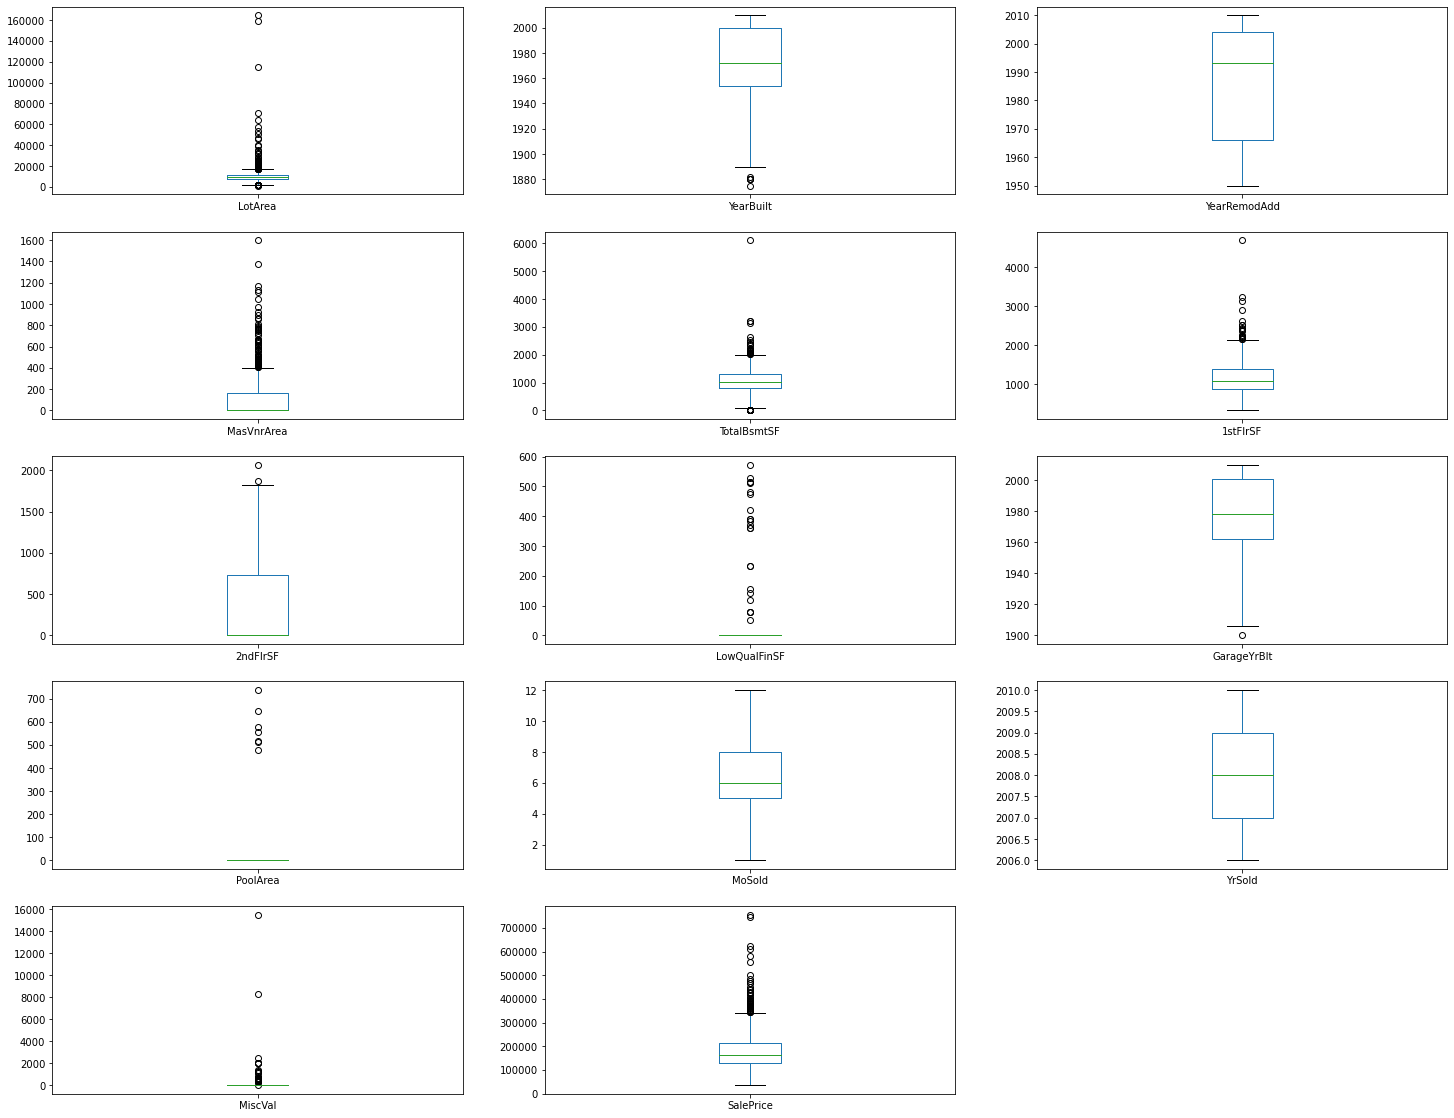

In [42]:
df_non_cat_columns.plot(kind = 'box',subplots=True,layout=(5,3),figsize=(25,20))
plt.show()

###### We can see that Outliers are present in;

LotArea

YearBuilt

MasVnrArea

TotalBsmtSF

1stFlrSF

2ndFlrSF

LowQualFinSF

GaragYrBuilt

PoolArea

MiscVal

SalePrice

### Removing Outliers

#### IQR Technique

In [43]:
for i in non_cat_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_1 = df[(df[i] > lower_limit) & (df[i] < upper_limit)]
df_1.shape

(1123, 68)

In [44]:
df_1.shape

(1123, 68)

### VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return(vif.sort_values(by='VIF_Values',ascending = False))

In [47]:


calculate_vif(df_non_cat_columns)

,Features,VIF_Values
8,GarageYrBlt,19947.275627
2,YearRemodAdd,17291.653215
11,YrSold,14694.006181
1,YearBuilt,14126.123355
5,1stFlrSF,37.074900
4,TotalBsmtSF,22.859709
13,SalePrice,21.399510
10,MoSold,6.656332
6,2ndFlrSF,2.858916
0,LotArea,2.749844


In [48]:
df_1.drop(['GarageYrBlt','YearRemodAdd','YrSold','YearBuilt','1stFlrSF','TotalBsmtSF'],axis=1,inplace=True)

In [49]:
df_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,BsmtBath,Bath,Total_porch
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1,1,8,9,3,0.0,3,4,1,2,4,4,0,6,1,4,1,4,0,0,958,2,1,3,5,6,1,5,1,2,2,440,5,5,2,0,0,0,2,8,4,128000,0.0,2.0,205
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,0,5,12,13,3,0.0,2,2,2,4,1,1,0,5,1,0,1,4,0,0,2217,4,1,2,8,6,1,5,1,3,2,621,5,5,2,81,0,0,10,8,4,268000,1.0,2.0,431
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1,1,7,7,3,0.0,2,4,2,2,4,0,2,6,1,0,1,4,886,0,2013,3,1,3,8,6,1,5,1,3,2,455,5,5,2,180,0,0,6,8,4,269790,1.0,2.5,130
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,3,1,8,9,1,480.0,3,4,1,2,4,4,1,6,1,0,1,4,0,0,1844,3,1,3,7,6,1,5,1,2,2,546,5,5,2,0,0,0,1,0,4,190000,0.0,2.0,122
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1,1,4,4,4,126.0,2,4,1,2,4,4,0,6,1,2,1,4,0,0,1602,3,1,2,8,6,1,5,1,0,2,529,5,5,2,240,0,0,6,8,4,215000,0.5,2.0,0


In [50]:
df_1.shape

(1123, 62)

### Splitting Data into x and y

In [51]:
x = df_1.drop('SalePrice',axis=1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,BsmtBath,Bath,Total_porch
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1,1,8,9,3,0.0,3,4,1,2,4,4,0,6,1,4,1,4,0,0,958,2,1,3,5,6,1,5,1,2,2,440,5,5,2,0,0,0,2,8,4,0.0,2.0,205
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,0,5,12,13,3,0.0,2,2,2,4,1,1,0,5,1,0,1,4,0,0,2217,4,1,2,8,6,1,5,1,3,2,621,5,5,2,81,0,0,10,8,4,1.0,2.0,431
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1,1,7,7,3,0.0,2,4,2,2,4,0,2,6,1,0,1,4,886,0,2013,3,1,3,8,6,1,5,1,3,2,455,5,5,2,180,0,0,6,8,4,1.0,2.5,130
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,3,1,8,9,1,480.0,3,4,1,2,4,4,1,6,1,0,1,4,0,0,1844,3,1,3,7,6,1,5,1,2,2,546,5,5,2,0,0,0,1,0,4,0.0,2.0,122
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1,1,4,4,4,126.0,2,4,1,2,4,4,0,6,1,2,1,4,0,0,1602,3,1,2,8,6,1,5,1,0,2,529,5,5,2,240,0,0,6,8,4,0.5,2.0,0


In [52]:
y = df_1['SalePrice']
y.shape

(1123,)

In [53]:
x.shape

(1123, 61)

### Normalizing Data using Power Transform

In [54]:
from sklearn.preprocessing import power_transform
x1 = power_transform(x)

In [55]:
type(x1)

numpy.ndarray

In [56]:
x = pd.DataFrame(x1,columns=x.columns)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,BsmtBath,Bath,Total_porch
0,1.358585,-0.162767,0.126036,-1.189163,0.059788,-1.382952,0.339314,0.0,0.617941,-0.239664,0.232633,0.05714,0.009613,2.274411,-0.447968,0.001923,-0.508270,-0.360859,-0.081808,-0.316981,-0.202032,0.490601,-0.798607,0.750149,0.381988,-0.520215,-0.747144,0.350647,0.689839,-1.580142,0.411980,-0.094911,1.208812,0.273205,0.309159,-0.867794,-0.141357,-1.218433,-1.099946,-0.172942,0.927631,-0.962104,0.28249,0.834818,1.572988,-0.785602,-0.088898,0.332004,-0.062973,0.341013,0.324504,0.307475,-0.936761,-0.073291,-0.197111,-1.722578,0.381639,0.067992,-0.894534,0.489357,1.115593
1,-1.173334,-0.162767,1.165689,1.145932,0.059788,-1.382952,0.339314,0.0,0.617941,4.172510,0.072468,0.05714,0.009613,-0.444037,-0.447968,1.555660,0.391701,-5.102431,5.689272,1.163799,1.125069,0.490601,-0.798607,-1.257826,-2.618189,0.877159,1.020658,-2.866627,-1.444597,-1.580142,-1.860866,-0.094911,-0.997654,0.273205,0.309159,-0.867794,-0.141357,1.424971,1.376057,-0.172942,-0.802635,1.025216,0.28249,0.834818,1.572988,-0.785602,0.975454,0.332004,0.761949,0.341013,0.324504,0.307475,0.829455,-0.073291,-0.197111,1.323085,0.381639,0.067992,1.140070,0.489357,1.690087
2,0.478824,-0.162767,1.045310,0.193635,0.059788,-1.382952,0.339314,0.0,-1.477878,-0.239664,0.543860,0.05714,0.009613,-0.444037,1.024317,0.777647,-0.508270,-0.360859,-0.081808,-0.638180,-0.774928,0.490601,-0.798607,-1.257826,0.381988,0.877159,-0.747144,0.350647,-1.714505,-0.392990,0.411980,-0.094911,-0.997654,0.273205,0.309159,1.184176,-0.141357,1.112064,0.164480,-0.172942,0.927631,1.025216,0.28249,0.834818,1.572988,-0.785602,0.975454,0.332004,0.007315,0.341013,0.324504,0.307475,1.076693,-0.073291,-0.197111,-0.067412,0.381639,0.067992,1.140070,1.215668,0.802012
3,-1.173334,-0.162767,1.550964,0.534889,0.059788,-1.382952,0.339314,0.0,0.617941,-0.239664,0.389676,0.05714,0.009613,-0.444037,-0.447968,0.001923,0.391701,1.802257,-0.081808,-0.316981,-0.202032,-1.373758,1.416250,0.750149,0.381988,-0.520215,-0.747144,0.350647,0.689839,-0.917282,0.411980,-0.094911,-0.997654,0.273205,0.309159,-0.867794,-0.141357,0.829825,0.164480,-0.172942,0.927631,0.434367,0.28249,0.834818,1.572988,-0.785602,-0.088898,0.332004,0.425860,0.341013,0.324504,0.307475,-0.936761,-0.073291,-0.197111,-2.222487,-2.904934,0.067992,-0.894534,0.489357,0.760450
4,-1.173334,-0.162767,0.126036,1.243147,0.059788,-1.382952,0.339314,0.0,-1.020007,-0.239664,0.389676,0.05714,0.009613,-0.444037,-0.447968,0.001923,1.215644,-0.360859,-0.081808,-1.466671,-1.500917,1.841101,1.197155,-1.257826,0.381988,-0.520215,-0.747144,0.350647,0.689839,-1.580142,0.411980,-0.094911,0.600907,0.273205,0.309159,-0.867794,-0.141357,0.380990,0.164480,-0.172942,-0.802635,1.025216,0.28249,0.834818,1.572988,-0.785602,-1.569815,0.332004,0.348626,0.341013,0.324504,0.307475,1.161684,-0.073291,-0.197111,-0.067412,0.381639,0.067992,0.492868,0.489357,-1.311905


## Test Data

In [58]:
df_2 = pd.read_csv('test.housing.csv')
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [59]:
df_2.shape

(292, 80)

###### In test dataset we have 292 rows and  80.

In [60]:
for i in df_2.columns:
    if df_2[i].isnull().sum()>0:
        print(i,df_2[i].isnull().sum())

LotFrontage 45
Alley 278
MasVnrType 1
MasVnrArea 1
BsmtQual 7
BsmtCond 7
BsmtExposure 7
BsmtFinType1 7
BsmtFinType2 7
Electrical 1
FireplaceQu 139
GarageType 17
GarageYrBlt 17
GarageFinish 17
GarageQual 17
GarageCond 17
PoolQC 292
Fence 248
MiscFeature 282


In [61]:
df_2.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

### Analyzing the Data

In [62]:
df_2.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [63]:
df_2['BsmtHalfBath'] = 0.5 * df_2['BsmtHalfBath']
df_2['HalfBath'] = 0.5 * df_2['HalfBath']

In [64]:
df_2['BsmtBath'] = df_2['BsmtHalfBath'] + df_2['BsmtFullBath']
df_2['Bath'] = df_2['HalfBath'] + df_2['FullBath']

In [65]:
df_2.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

In [66]:
df_2['Total_porch'] = df_2['OpenPorchSF'] + df_2['EnclosedPorch'] + df_2['3SsnPorch'] + df_2['ScreenPorch']

### Handling Missing values

In [67]:
df_2['LotFrontage'] = df_2['LotFrontage'].fillna(df['LotFrontage'].mean())

In [68]:
df_2['MasVnrType'] = df_2['MasVnrType'].fillna('NA')
df_2['MasVnrArea'] = df_2['MasVnrArea'].fillna(df_2['MasVnrArea'].mean())

In [69]:
df_2['BsmtQual'] = df_2['BsmtQual'].fillna('NA')
df_2['BsmtCond'] = df_2['BsmtCond'].fillna('NA')
df_2['BsmtExposure'] = df_2['BsmtExposure'].fillna('NA')
df_2['BsmtFinType1'] = df_2['BsmtFinType1'].fillna('NA')
df_2['BsmtFinType2'] = df_2['BsmtFinType2'].fillna('NA')

In [70]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')

In [71]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [72]:
df_2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtBath,Bath,Total_porch
0,20,RL,86.00000,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0,7,2007,WD,Normal,1.0,2.0,51
1,120,RL,70.98847,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0,8,2009,COD,Abnorml,1.0,1.0,0
2,20,RL,70.98847,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0,6,2009,WD,Normal,0.0,2.0,151
3,70,RL,75.00000,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,704,GasA,Ex,Y,SBrkr,860,704,0,1564,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal,0.0,1.5,0
4,60,RL,86.00000,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal,0.0,2.5,18


In [73]:
df_2.shape

(292, 71)

In [74]:
df_2.drop(['GarageYrBlt','YearRemodAdd','YrSold','YearBuilt','1stFlrSF','TotalBsmtSF'],axis=1,inplace=True)

###### We dropped these column because in training data we had to dropped that columns.

In [77]:
df_2.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

In [78]:
df_2.shape

(292, 61)

###### We fill all the missing values and dropped the unnecessary columns. Now we have to merge training and testing data.

### Data Conversion

In [84]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [86]:
for i in df_2.columns:
    if df_2[i].dtypes == object:
        df_2[i] = lec.fit_transform(df_2[i])

In [87]:
df_2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,BsmtBath,Bath,Total_porch
0,20,2,86.00000,14157,1,0,1,0,0,0,21,2,0,0,2,9,5,3,0,9,11,4,200.0,2,3,2,0,3,1,2,6,0,0,1,3,0,0,1922,3,1,2,8,5,1,2,1,0,3,676,4,4,2,178,0,0,7,5,2,1.0,2.0,51
1,120,2,70.98847,5814,1,0,3,0,1,0,21,2,0,4,2,8,5,1,0,5,5,3,0.0,2,3,1,2,3,0,2,6,0,2,1,3,0,0,1360,1,1,2,4,5,1,0,1,1,2,565,4,4,2,63,0,0,8,0,0,1.0,1.0,0
2,20,2,70.98847,11838,1,3,3,0,4,0,4,2,0,0,2,8,5,3,0,9,11,3,0.0,2,3,2,2,3,0,6,6,0,0,1,3,0,0,1788,3,1,0,7,5,1,4,1,1,2,522,4,4,2,202,0,0,6,5,2,0.0,2.0,151
3,70,2,75.00000,12000,1,3,0,0,4,0,5,2,0,0,5,7,7,1,0,6,7,3,0.0,3,3,1,4,3,4,5,6,0,0,1,3,704,0,1564,3,1,1,7,5,1,2,1,2,1,234,4,4,2,0,0,0,7,5,2,0.0,1.5,0
4,60,2,86.00000,14598,1,0,3,0,1,0,20,1,0,0,5,6,5,1,0,9,11,4,74.0,2,3,2,2,3,2,6,6,0,0,1,3,1039,0,1933,4,1,2,9,5,1,2,3,0,3,668,4,4,2,100,0,0,1,5,2,0.0,2.5,18


### Scaling the Model

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
hs = sc.fit_transform(x)

### Training Process

In [121]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Random State

In [97]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_tr = lr.predict(x_train)
    pred_ts = lr.predict(x_test)
    print(f"At random state {i},the training accuracy is : {r2_score(y_train,pred_tr)}")
    print(f"At random state {i},the testing accuracy is : {r2_score(y_test,pred_ts)}")
    print("\n")


At random state 0,the training accuracy is : 0.8649247264936992
At random state 0,the testing accuracy is : 0.8082352995722669


At random state 1,the training accuracy is : 0.8574935395767996
At random state 1,the testing accuracy is : 0.8419765951366185


At random state 2,the training accuracy is : 0.8635643197432396
At random state 2,the testing accuracy is : 0.7979511236812576


At random state 3,the training accuracy is : 0.8596420709895334
At random state 3,the testing accuracy is : 0.8406167807688258


At random state 4,the training accuracy is : 0.8634219932206929
At random state 4,the testing accuracy is : 0.8074848642195581


At random state 5,the training accuracy is : 0.8632562719361406
At random state 5,the testing accuracy is : 0.7915676997796643


At random state 6,the training accuracy is : 0.8598523636026157
At random state 6,the testing accuracy is : 0.8380132336204594


At random state 7,the training accuracy is : 0.8714593212628705
At random state 7,the testing acc

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=69)

In [99]:
x_train.shape

(786, 61)

In [100]:
x_test.shape

(337, 61)

In [101]:
y_train.shape

(786,)

In [102]:
y_test.shape

(337,)

In [103]:
lr.fit(x_train,y_train)

LinearRegression()

In [104]:
pred_ts = lr.predict(x_test)

In [105]:
print(r2_score(y_test,pred_ts))

0.8530786258053514


### Cross Validation Score

In [110]:
tr_accu = r2_score(y_train,pred_tr)
ts_accu = r2_score(y_test,pred_ts)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold{j} the cv score {cv_mean} and accuracy score for training is {tr_accu} and accuracy for testing is {ts_accu}")
    print("\n")

At cross fold2 the cv score -1.3025231349048781e+23 and accuracy score for training is -0.740682120018108 and accuracy for testing is 0.8530786258053514


At cross fold3 the cv score 0.8046657249342059 and accuracy score for training is -0.740682120018108 and accuracy for testing is 0.8530786258053514


At cross fold4 the cv score 0.8112786346157745 and accuracy score for training is -0.740682120018108 and accuracy for testing is 0.8530786258053514


At cross fold5 the cv score 0.8075255320217801 and accuracy score for training is -0.740682120018108 and accuracy for testing is 0.8530786258053514


At cross fold6 the cv score 0.8124253169720479 and accuracy score for training is -0.740682120018108 and accuracy for testing is 0.8530786258053514


At cross fold7 the cv score 0.8079715346857216 and accuracy score for training is -0.740682120018108 and accuracy for testing is 0.8530786258053514


At cross fold8 the cv score 0.8131561298172731 and accuracy score for training is -0.7406821200

### Model Testing

In [111]:
def train(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,cv=6)
    cv_score = np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE',mean_squared_error(y,pred))
    print('CV',cv_score)

Model Report
MSE 501113312.4375796
CV 0.8124253169720479


<Figure size 1440x720 with 0 Axes>

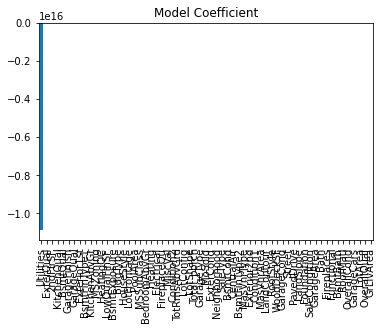

<Figure size 1440x720 with 0 Axes>

In [114]:
model = LinearRegression()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficient')

Model Report
MSE 652110389.6752236
CV 0.8026659729449644


<AxesSubplot:title={'center':'Model Coefficients'}>

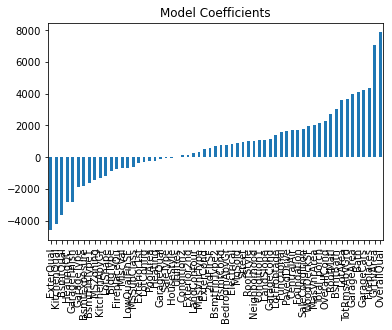

In [115]:
model = Ridge(normalize=True)
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 501113321.4305417
CV 0.8124111293499668


<AxesSubplot:title={'center':'Model Coefficients'}>

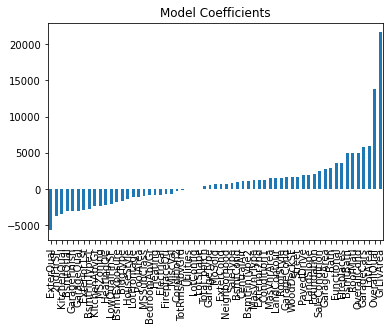

In [116]:
model = Lasso()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 0.0
CV 0.6756161512447584


<AxesSubplot:title={'center':'Feature Importance'}>

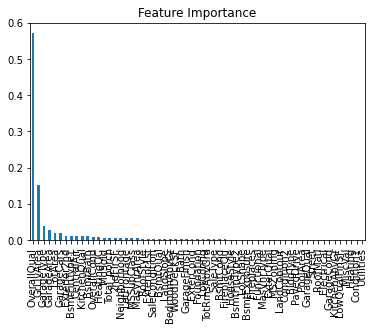

In [117]:
model = DecisionTreeRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 71978887.44619384
CV 0.8498473403691346


<AxesSubplot:title={'center':'Feature Importance'}>

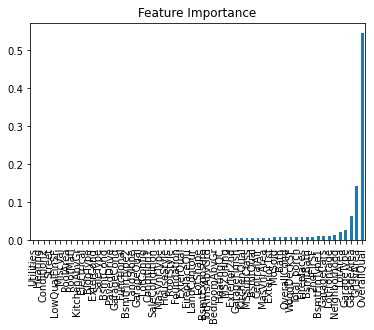

In [118]:
model = RandomForestRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 0.0
CV 0.8551110987778631


<AxesSubplot:title={'center':'Feature Importance'}>

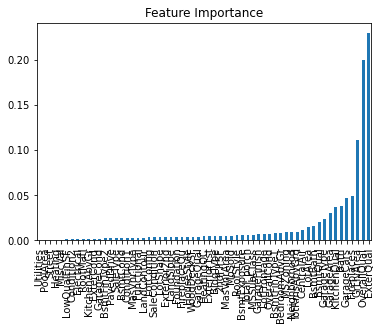

In [119]:
model = ExtraTreesRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 516840332.69815195
CV 0.8033873414042279


<AxesSubplot:title={'center':'Feature Importance'}>

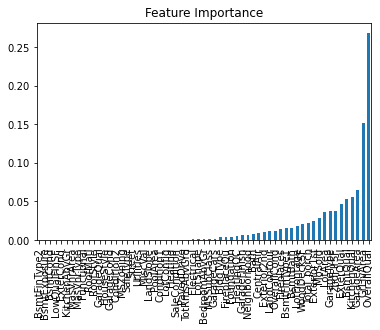

In [120]:
model = AdaBoostRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Feature Importance')